# Тетрадка с проверкой работоспособности бустинга

In [1]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

from bank_schedule import forecast
from bank_schedule.data import Data
from bank_schedule.constants import RAW_DATA_FOLDER

## Загружаем данные и инициализируем модель

In [2]:
loader = Data(RAW_DATA_FOLDER)
my_model = forecast.IncomeForecastLGBM()

In [3]:
in_df = loader.get_money_in()

## Строим прогноз и считаем метрики

In [4]:
n_periods = 14
predictions = my_model.predict('2022-10-30', n_periods)
display(predictions)

,date,TID,money_in
0,2022-10-31,406136,85942.749663
1,2022-10-31,406139,145946.108882
2,2022-10-31,406145,112694.489416
3,2022-10-31,406148,65073.362363
4,2022-10-31,406180,72617.351326
...,...,...,...
1625,2022-11-13,699578,9706.167562
1626,2022-11-13,699579,40549.284817
1627,2022-11-13,699629,55578.588828
1628,2022-11-13,699641,31314.852292


Mean Absolute Error: 11217.88
Mean Absolute Percentage Error: 0.23


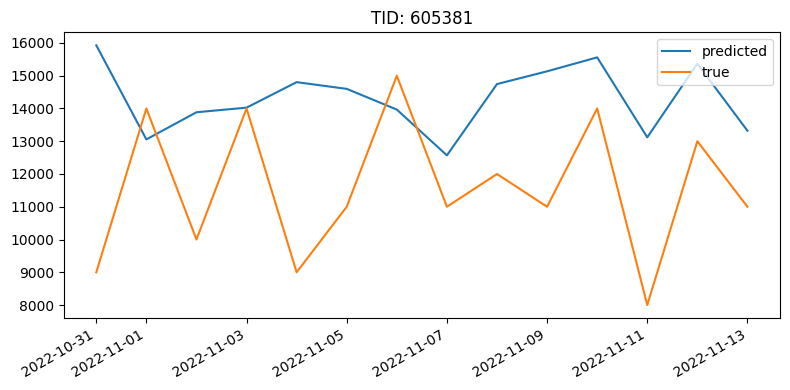

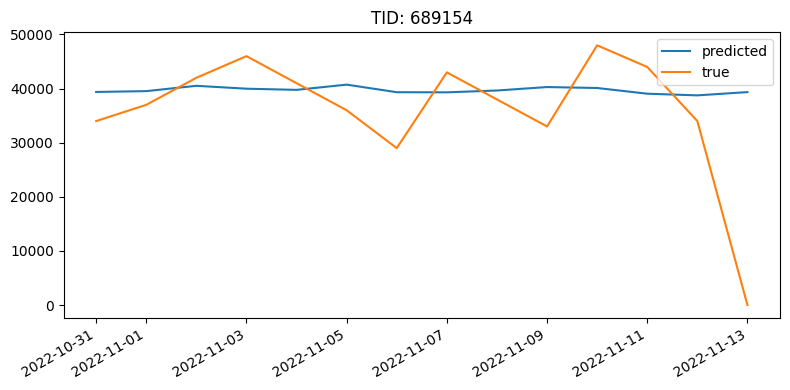

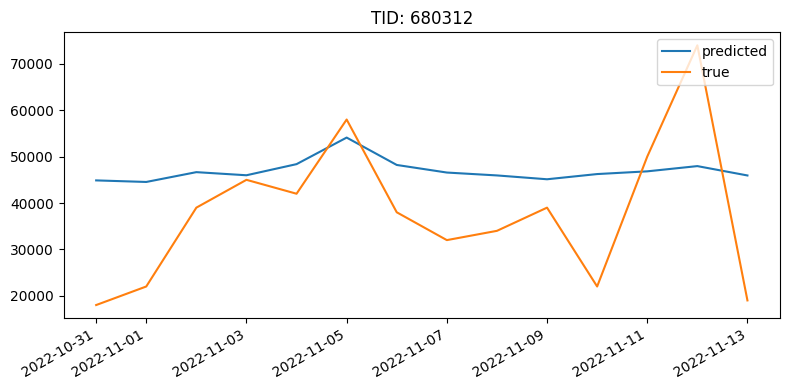

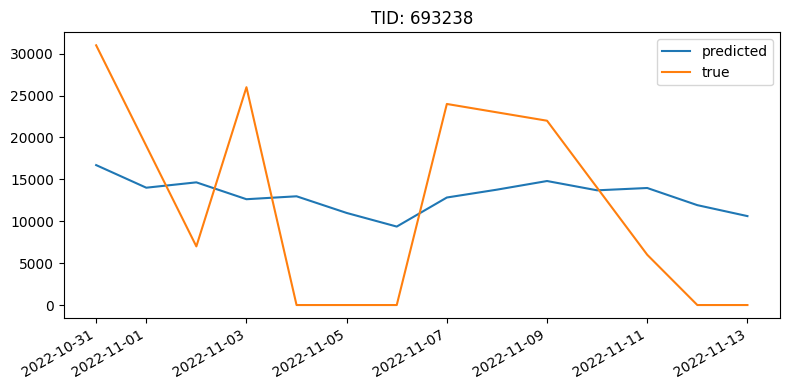

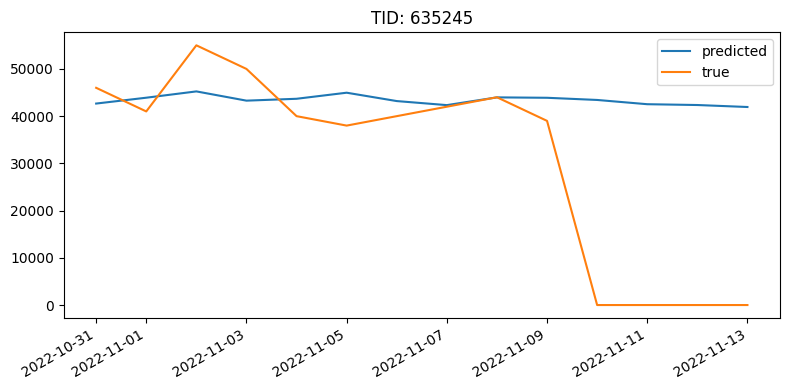

In [5]:
result_df = predictions.merge(in_df, how='left', on=['date', 'TID'], suffixes=('_predicted', '_true'))
result_df.set_index('date', inplace=True)

mae = mean_absolute_error(result_df['money_in_true'],
                          result_df['money_in_predicted'])

print(f'Mean Absolute Error: {round(mae, 2)}')

mape = mean_absolute_percentage_error(
    result_df.loc[result_df['money_in_true'] != 0, 'money_in_true'],
    result_df.loc[result_df['money_in_true'] != 0, 'money_in_predicted']
    )

print(f'Mean Absolute Percentage Error: {round(mape, 2)}')


tid_to_plot = result_df['TID'].sample(n=5)

for tid in tid_to_plot:
    cond = result_df['TID'] == tid
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(result_df.loc[cond, 'money_in_predicted'], label='predicted')
    ax.plot(result_df.loc[cond, 'money_in_true'], label='true')
    ax.set_title(f'TID: {tid}')
    fig.autofmt_xdate()
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()